# Coursework 1

## Question 1.a
Partition the provided face data into your training and testing data, in a way you choose.
Explain briefly the way you partitioned. Apply PCA to your training data i.e. compute the
eigenvectors and eigenvalues of the covariance matrix $S=(1/N)AA^{T}$ directly. Show and discuss, including: the eigenvectors and eigenvalues, the mean image, how many
eigenvectors are with non-zero eigenvalues, and how many eigenvectors are to be used
for face recognition. Give physical meanings behind your answers.

### Loading Face Dataset

In [71]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_content = sio.loadmat( 'face(1).mat' )

mat_content

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

* __X__ contains the face data, where each column of __X__ is a one image from a total of 520 images.
* __l__ contains the label/face identity of each image

In [72]:
face_data = mat_content[ 'X' ]

print( face_data.shape )

(2576, 520)


Each image is a column that is 2576 values long.

In [73]:
face_157 = face_data[:,157]

print(face_157.shape)
print(face_157)

(2576,)
[ 55  55  54 ... 168 168 174]


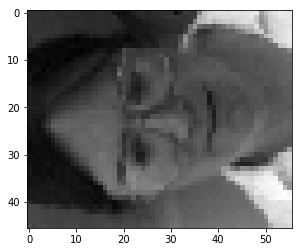

In [74]:
# face data is in 46x56 format

face_157 = np.reshape(face_157,(46,56))

plt.imshow(face_157, cmap = 'gist_gray')

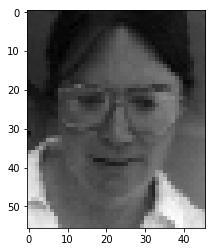

In [75]:
face_157 = face_157.T
plt.imshow(face_157,cmap = 'gist_gray')

In [76]:
face_labels = mat_content['l']
print(face_labels[0,157])

16


___
### Splitting into Training and Test Sets
If the number of values belonging to each class are unbalanced, stratified sampling is a good thing, since it keeps the class proportions in the training and test sets from the whole dataset.

For this dataset, we have 520 images, but 52 faces. Each identity has 10 images, so we have balanced classes. As such, a purely random shuffle should give a fair test and train split.

From [StackOverflow: Stratified Sampling Necessary?](https://datascience.stackexchange.com/questions/16265/is-stratified-sampling-necessary-random-forest-python)

In [77]:
print( face_data.shape )

(2576, 520)


#### Reshaping Data Set
Personally, I find it weird having each image in a column as opposed to a row. In my head, it makes much more sense of each image was in a row.

Tranpose the dataset, so we have __520__ rows, each one __2576__ long containing a face image.

In [78]:
face_data_row = face_data.T
print( face_data_row.shape )

(520, 2576)


In [79]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split( face_data_row, test_size = 0.2, random_state = 42 )

In [80]:
print( 'Train Set: {}, Percentage: {} %'.format( train_set.shape, 100*train_set.shape[0] / face_data_row.shape[ 0 ] ) )
print( 'Test  Set: {}, Percentage: {} %'.format( test_set.shape, 100*test_set.shape[0] / face_data_row.shape[ 0 ]) )

Train Set: (416, 2576), Percentage: 80.0 %
Test  Set: (104, 2576), Percentage: 20.0 %


#### Dataset with labels
It might be a good idea to have the identity labels attached to the dataset

In [81]:
face_data_labels = mat_content[ 'l' ]

print( 'Face Data Shape: {}'.format( face_data.shape ) )
print( 'Face Data Labels Shape: {}'.format( face_data_labels.shape ) )

Face Data Shape: (2576, 520)
Face Data Labels Shape: (1, 520)


In [82]:
faceDataLabeled = np.vstack( ( face_data, face_data_labels ) )

print( 'Face Data Labeled Shape: {}'.format( faceDataLabeled.shape ) )

Face Data Labeled Shape: (2577, 520)


We now have a dataset __faceDataLabeled__ which contains the images with their identities in the bottom-most row.

In [83]:
rowLabel = faceDataLabeled[ 2576 ]

___
### Applying PCA 
We dont actually need class labels for PCA analysis, so we can use the **train_set** data set instead of the __faceDataLabeled__ data set.

#### Calculate d-dimensional mean vector
We have 2576 dimensions, need to calculate the mean for each dimension to get the mean face.

In [84]:
train_set[ : 1] # Access a row

print( train_set[ : , 1 ].shape ) # Access a column

(416,)


In [85]:
# Some dirty list comprehension below. Essentially iterate over the columns in the train_set and calculate
# mean for each column ( d means )
mean_face_row = np.array( [ [ np.mean( train_set[ : ,col ] ) for col in range( train_set.shape[ 1 ] ) ] ] ) 

print( 'Mean Vector: \n {}'.format( mean_face_row ) )

Mean Vector: 
 [[124.06971154 123.26682692 121.08413462 ...  85.33653846  83.44711538
   81.86298077]]


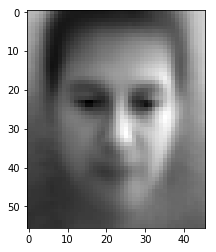

In [86]:
mean_face_img = np.reshape(mean_face_row,(46,56))

plt.imshow( mean_face_img.T, cmap = 'gist_gray')

#### Computing Covariance Matrix

In [87]:
cov_mat = np.cov( [ col for col in train_set.T ] )

print( 'Shape of cov_mat: {}'.format( cov_mat.shape ) )

Shape of cov_mat: (2576, 2576)


Now we use the formula $1/N*A*A^T$, first we calculate A

In [88]:
cov_mat = train_set.astype( 'float64' )
for i in range(train_set.shape[0]):  # iterate over rows
    cov_mat[i,:] = cov_mat[i,:] - mean_face_row
cov_mat = 1/train_set.shape[0] * np.dot(np.transpose(cov_mat),cov_mat)
print(cov_mat)

[[2635.84850569 2504.59918755 2278.75134638 ... -493.08836446
  -564.21145756 -574.64910202]
 [2504.59918755 2689.94563032 2541.77562754 ... -465.71720137
  -539.45824473 -558.97786266]
 [2278.75134638 2541.77562754 2653.38955598 ... -455.51389146
  -511.19867557 -528.54135656]
 ...
 [-493.08836446 -465.71720137 -455.51389146 ... 2799.15597263
  2644.4913554  2494.27688147]
 [-564.21145756 -539.45824473 -511.19867557 ... 2644.4913554
  2906.73278014 2785.01799418]
 [-574.64910202 -558.97786266 -528.54135656 ... 2494.27688147
  2785.01799418 2950.62305265]]


The covariance matrix contains the covariance between each pair of features, all 2576 of them, resulting in a $2576\times2576$ matrix. Along the main diagonal of the matrix, we have the variance of the feature.

The mean vector is often referred to as the centroid and the variance-covariance matrix as the dispersion or dispersion matrix. Also, the terms variance-covariance matrix and covariance matrix are used interchangeably. 

[Mean Vector and Covariance Matrix](https://www.itl.nist.gov/div898/handbook/pmc/section5/pmc541.htm)

##### Why do we need the covariance matrix?

The following article is a __mustread__. It goes over the covariance matrix, and why calculating the eigenvectors is important.

[A geometric interpretation of the covariance matrix](http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/?fbclid=IwAR2HCYZtV9m7_miA3YeMD2Cpx5w9wT8UlO3ncGWiJN-FNHvx3Tvsz2bgUJc)

#### Computing Eigenvectors and corresponding eigenvalues

Eigenvectors and eigenvalues uniquely define the covariance matrix, and as such, the data set.

In [89]:
eig_val, eig_vec = np.linalg.eig( cov_mat )

In [90]:
eig_val.shape

(2576,)

We can interpret the covariance matrix as a linear operator that transforms white data into the data that is observed in the training set.

The covariance matrix defines both the spread and orientation of our data. We would like to represent the covariance matrix with a vector and its magnitude. What we want to do is find the vector that points into the direction of the largest spread of data, and whose magnitude equals the spread in that direction.

Define the vector $\textbf{v}$, and the dataset $\textbf{D}$. The projection of the data onto this vector is $\textbf{v}^T \textbf{D}$, and the variance is $\textbf{v}^T\sum \textbf{v}$

We want the vector that points in the direction of largest variance, so we choose components such that the covariance matrix of the projected data is as large as possible. This is achieved by setting $\textbf{v}$ equal to the largest eigenvector of the covariance matrix. The second largest eigenvector is always orthogonal to the largest eigenvector, and points into the direction of the second largest spread of data.

#### Sorting eigenvectors based on eigenvalues

In [91]:
eig_pairs = [ (np.abs( eig_val[ i ] ), eig_vec[ :, i ] ) for i in range( len( eig_val ) ) ]

eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in eig_pairs:
    print( i[ 0 ])

925024.7089041442
532530.6315193954
448877.8466168924
263240.39129072166
223404.15014935445
141717.61246414387
132692.99285091058
116053.13020208251
99239.42387783811
81012.5869877316
62333.304539364755
58557.86112810771
52211.26106125647
51095.37583350443
45635.411439718075
42171.85007475326
39577.138419967734
35338.33108326097
33726.46469453218
32727.661642764946
29464.334880192368
26369.83962284394
25681.91126235672
24494.27292721904
22799.51237911536
22251.603337679466
20953.087892639876
19987.70433342372
19099.217001246747
18584.693459966307
17953.99255317551
17156.697825758998
16956.973025359366
15823.73423956549
15510.730907366133
14306.862624015477
13919.936407175637
13810.090203959026
13162.359075832735
12740.846633719899
12396.646610435828
11679.524416144517
11364.190234871408
11112.61349964693
10859.672753751389
10524.413889439304
10067.862584866343
9851.444762283769
9625.911605500876
9442.979308113974
9006.241141320863
8827.187995876877
8620.589153987998
8337.643158762487
8

3.619044634118877e-12
3.619044634118877e-12
3.607423807838596e-12
3.607423807838596e-12
3.605969596275763e-12
3.605969596275763e-12
3.5840649279172144e-12
3.5840649279172144e-12
3.574976295833178e-12
3.574976295833178e-12
3.573467818623114e-12
3.5456194884354788e-12
3.5456194884354788e-12
3.5389077770195367e-12
3.5389077770195367e-12
3.5383023263902956e-12
3.5383023263902956e-12
3.521635838270779e-12
3.521635838270779e-12
3.519587654548352e-12
3.519587654548352e-12
3.510555981626589e-12
3.510555981626589e-12
3.50992798836871e-12
3.50992798836871e-12
3.501594486409496e-12
3.501594486409496e-12
3.494655133339596e-12
3.494655133339596e-12
3.4879010761039048e-12
3.4879010761039048e-12
3.485096132730074e-12
3.485096132730074e-12
3.480656126032811e-12
3.480656126032811e-12
3.480086631660517e-12
3.480086631660517e-12
3.4521750871690457e-12
3.4521750871690457e-12
3.4470101138837923e-12
3.4470101138837923e-12
3.4165287790296102e-12
3.4165287790296102e-12
3.4142682496704565e-12
3.414268249670456

By quickly scrolling through the ordered eigenvalue eigenvector pairs, we can see that as we reach the bottom, we have eigenvalues which are very small (order of magnitude $10^{-11}$ and smaller). This suggests that these eigenvectors have the smallest spread of data. 

For the purpose of PCA, we want the eigenvectors with large eigenvalues, since they represent the data the most. The eigenvectors with smal eigenvalues close to 0 can be discarded.

In [92]:
k_eig_pairs = []

for i in eig_pairs:
    if( i[ 0 ] > 1 ):
        k_eig_pairs.append( i )

In [93]:
for i in k_eig_pairs:
    print( i[ 0 ] )

925024.7089041442
532530.6315193954
448877.8466168924
263240.39129072166
223404.15014935445
141717.61246414387
132692.99285091058
116053.13020208251
99239.42387783811
81012.5869877316
62333.304539364755
58557.86112810771
52211.26106125647
51095.37583350443
45635.411439718075
42171.85007475326
39577.138419967734
35338.33108326097
33726.46469453218
32727.661642764946
29464.334880192368
26369.83962284394
25681.91126235672
24494.27292721904
22799.51237911536
22251.603337679466
20953.087892639876
19987.70433342372
19099.217001246747
18584.693459966307
17953.99255317551
17156.697825758998
16956.973025359366
15823.73423956549
15510.730907366133
14306.862624015477
13919.936407175637
13810.090203959026
13162.359075832735
12740.846633719899
12396.646610435828
11679.524416144517
11364.190234871408
11112.61349964693
10859.672753751389
10524.413889439304
10067.862584866343
9851.444762283769
9625.911605500876
9442.979308113974
9006.241141320863
8827.187995876877
8620.589153987998
8337.643158762487
8

We can now represent the face images using this subset of the eigenvectors.

In [94]:
print( 'Original Eig_Pairs: {}'.format( len( eig_pairs ) ) )
print( 'Reduced Eig_Pairs: {}'.format( len( k_eig_pairs ) ) )

Original Eig_Pairs: 2576
Reduced Eig_Pairs: 415


We have reduced the dimensions from 2576 to 415 features. We can do face recognition by projecting training images onto this smaller subset and calculating the weights for each eigenvector.

[Eigenfaces for recognition](https://www.cs.ucsb.edu/~mturk/Papers/jcn.pdf)

Check if every element in the eigenvector is real: True


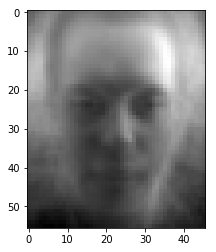

In [95]:
eigen_face_1 = k_eig_pairs[ 0 ][ 1 ]

print( 'Check if every element in the eigenvector is real: {}'.format( all( item for item in np.isreal( eigen_face_1 ) ) ) )

eigen_face_1_real = eigen_face_1.real

eigen_face_1_img = np.reshape(eigen_face_1_real,(46,56))

plt.imshow( eigen_face_1_img.T, cmap = 'gist_gray')

In [96]:
k_eig_pairs[ 0 ][ 1 ].shape

(2576,)

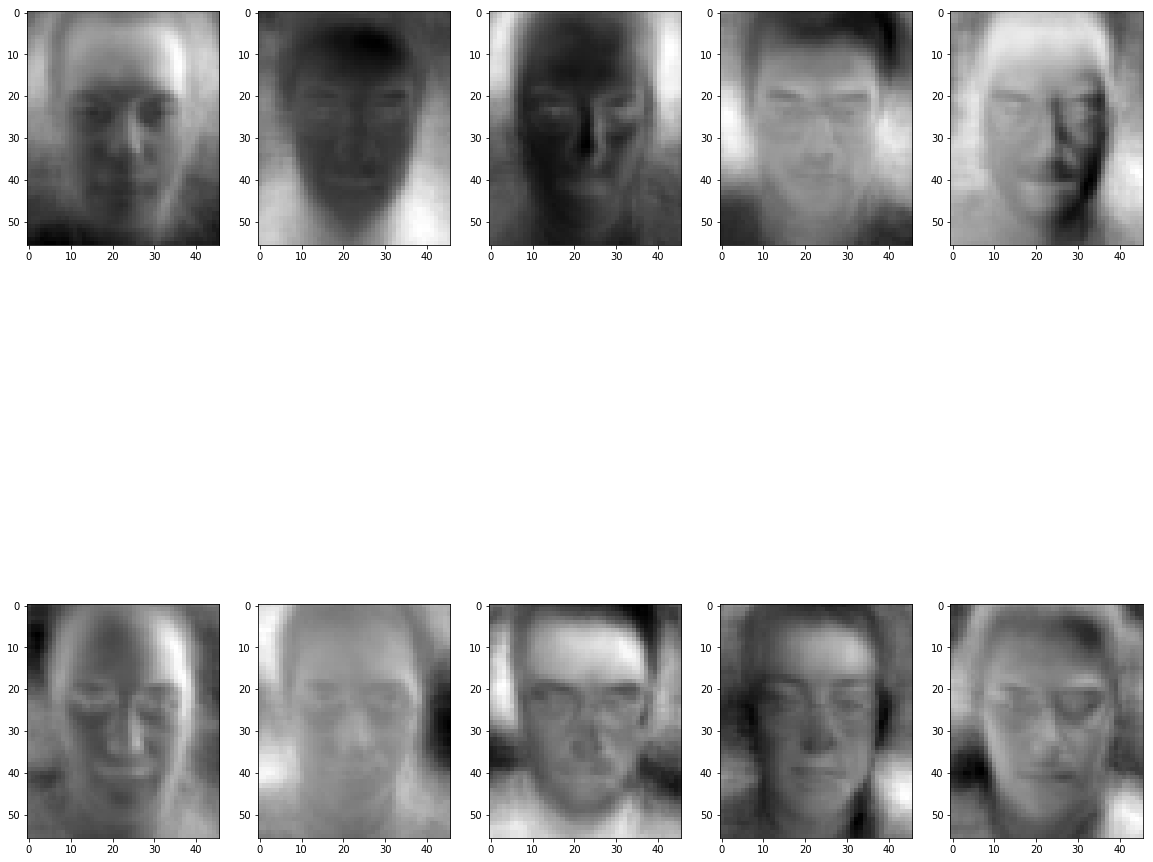

In [97]:
fig = plt.figure( figsize = ( 20, 20 ) )

for i in range( 10 ):
    eigen_vector      = k_eig_pairs[ i ][ 1 ]
    eigen_vector_real = eigen_vector.real
    
    eigen_face_img    = np.reshape( eigen_vector_real, ( 46, 56 ) )
    
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()

We now have 415 __eigenfaces__. Above is the eigenface of the eigenvector with the largest data spread.

___

## Question 1.b
Use the low-dimensional computation of eigenspace i.e. using $(1/N)A^{T} A$ of your training
data. Show and discuss, in comparison to a), including: if the eigenvectors and
eigenvalues obtained are identical, what are the pros/cons of each method. Show
respective measurements for your answers.

### Low dimension PCA

#### Figuring out what $\textbf{A}$ is
A is an $D\times N$ matrix. It is essentially the the vector containing the difference between the training image and the mean face.

In [98]:
mean_face_row = mean_face_row.reshape( 2576, )

# Go through the training set
# Subtract meanface from each image
# Construct A

A = train_set.astype( 'float64' )
A[ 0 ] - mean_face_row

array([ -8.06971154,   5.73317308,  19.91586538, ..., -37.33653846,
       -34.44711538, -33.86298077])

In [99]:
for rowIndex in range( A.shape[ 0 ] ):
    A[ rowIndex ] = A[ rowIndex ] - mean_face_row

In [100]:
A.shape

(416, 2576)

In [101]:
A.T.shape

(2576, 416)

In [102]:
lowDimension = np.divide( np.dot( A , A.T ), A.shape[ 0 ] )

lowDimension.shape

(416, 416)

In [103]:
lowDimEigVal, lowDimEigVec = np.linalg.eig( lowDimension )

In [104]:
lowDimEigVec[ 0 ].shape

(416,)

In [105]:
lowDim_eig_pairs = [ (np.abs( lowDimEigVal[ i ] ), lowDimEigVec[ :, i ] ) for i in range( len( lowDimEigVal ) ) ]

lowDim_eig_pairs.sort( key = lambda x: x[ 0 ], reverse = True )

for i in lowDim_eig_pairs:
    print( i[ 0 ])

925024.7089041435
532530.6315193925
448877.8466168922
263240.3912907212
223404.15014935486
141717.61246414357
132692.99285091003
116053.13020208327
99239.42387783821
81012.58698773116
62333.30453936534
58557.86112810766
52211.26106125649
51095.375833504055
45635.41143971809
42171.85007475302
39577.13841996797
35338.331083261
33726.46469453235
32727.661642764793
29464.3348801923
26369.839622843712
25681.911262356793
24494.272927218877
22799.512379115287
22251.603337679346
20953.087892640186
19987.704333423735
19099.21700124692
18584.693459966158
17953.99255317561
17156.697825758925
16956.973025359348
15823.734239565358
15510.730907366264
14306.862624015452
13919.936407175648
13810.090203959046
13162.359075832821
12740.846633719964
12396.646610435793
11679.524416144543
11364.190234871365
11112.613499646888
10859.672753751445
10524.4138894393
10067.862584866316
9851.444762283794
9625.911605500864
9442.979308113941
9006.241141320914
8827.187995876813
8620.58915398798
8337.643158762477
8245

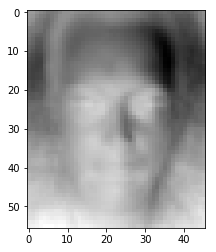

In [106]:
lowDim_eigen_vector = lowDim_eig_pairs[ 0 ][ 1 ]

eigen_face_0 = np.dot( A.T, lowDim_eigen_vector )

eigen_face_0_img = np.reshape(eigen_face_0,(46,56))

plt.imshow( eigen_face_0_img.T, cmap = 'gist_gray')

In [107]:
eigen_face_0 == eigen_face_1_real

array([False, False, False, ..., False, False, False])

Notice that the eigenface produced does not look exactly like the eigenface produced from the high dimension. This is because the resulting eigenvector from the low to high dimension transformation is not normalized.

> Meaning that, if ui is an eigenvector of TTT, then vi = Tui is an eigenvector of S. If we have a training set of 300 images of 100 × 100 pixels, the matrix TTT is a 300 × 300 matrix, which is much more manageable than the 10,000 × 10,000 covariance matrix. Notice however that the resulting vectors vi are not normalised; if normalisation is required it should be applied as an extra step.

In [108]:
from sklearn import preprocessing

normalized_eigen_face_0 = preprocessing.normalize( eigen_face_0.reshape( eigen_face_0.shape[ 0 ], 1 ) )

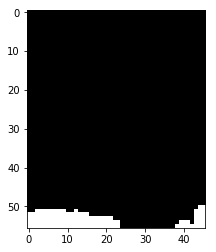

In [109]:
normalized_eigen_face_0 = normalized_eigen_face_0.reshape( normalized_eigen_face_0.shape[ 0 ], )

normalized_eigen_face_0_img = np.reshape( normalized_eigen_face_0,(46,56) )

plt.imshow( normalized_eigen_face_0_img.T, cmap = 'gist_gray')

In [110]:
print( k_eig_pairs[ 0 ][ 0 ] )
print( lowDim_eig_pairs[ 0 ][ 0 ] )

925024.7089041442
925024.7089041435


[-0.01326336 -0.014329   -0.0149903  ...  0.00311901  0.00294199
  0.00324892]
[-0.01020421 -0.00904605 -0.00676462 ...  0.04659409  0.04646237
  0.04692097]
[ 0.02072975  0.02245547  0.02520072 ... -0.01288773 -0.0129968
 -0.01524833]
[ 3.64884477e-03  3.71231283e-05 -2.06399333e-03 ... -2.96609879e-02
 -3.46289219e-02 -3.56360433e-02]
[ 0.00305093  0.00189186  0.00341335 ... -0.00250731 -0.00117799
  0.00063849]
[-0.03055336 -0.0353659  -0.03878672 ...  0.00968295  0.01120606
  0.01467684]
[-0.0392785  -0.04319218 -0.04606596 ... -0.00107122  0.00334807
  0.00540129]
[-0.01045439 -0.01359451 -0.01750039 ...  0.01367814  0.01853921
  0.0200555 ]
[0.01406478 0.01555306 0.01768192 ... 0.0322781  0.02485653 0.01917561]
[ 0.02831051  0.02732442  0.02882341 ... -0.06574401 -0.05899641
 -0.0532203 ]


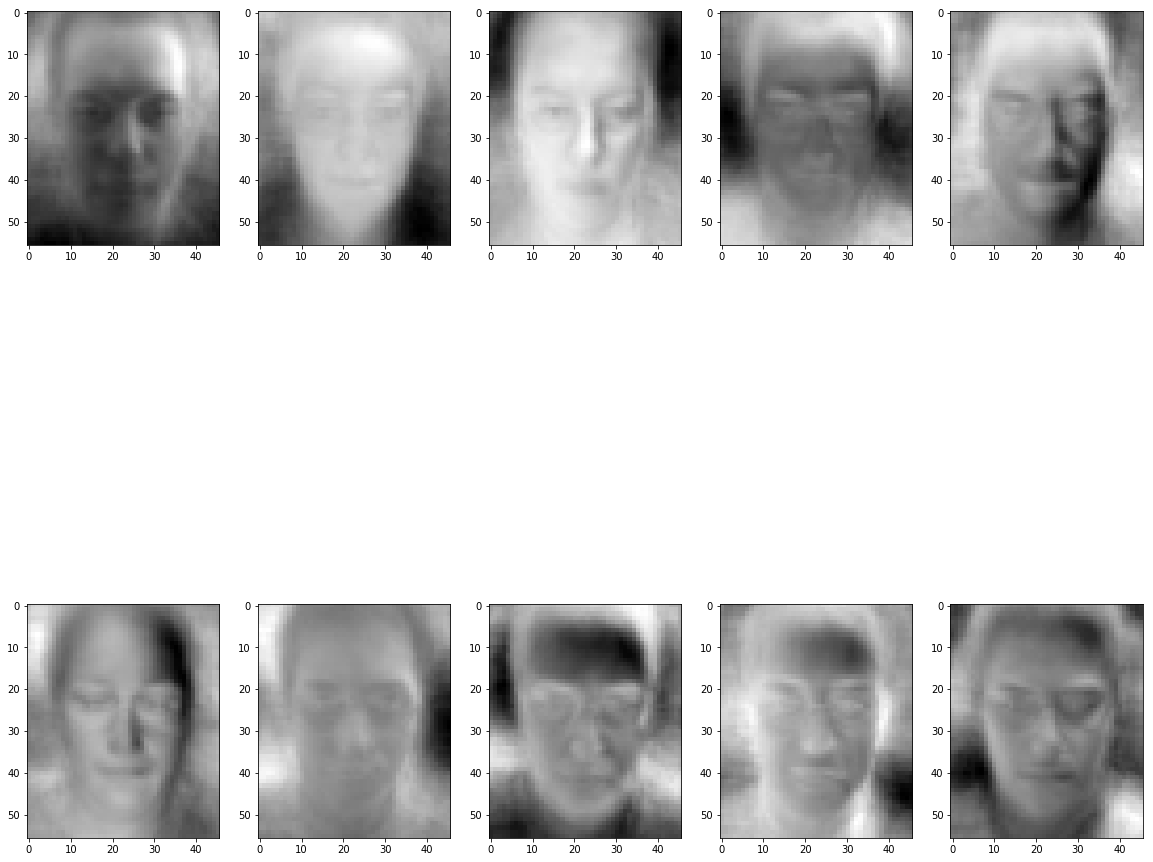

In [120]:
fig = plt.figure( figsize = ( 20, 20 ) )

for i in range( 10 ):
    eigen_vector      = lowDim_eig_pairs[ i ][ 1 ]
    eigen_vector_real = eigen_vector.real
        
    eigen_face        = np.dot( A.T, eigen_vector_real )
    
    norm = np.linalg.norm( eigen_face )
    
    eigen_face_img    = np.reshape( -1*eigen_face / norm, ( 46, 56 ) )

    print( eigen_face / norm )
    
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()

In [115]:
np.linalg.norm( eigen_face_0 )

19616.58173342449

[ 0.01326336  0.014329    0.0149903  ... -0.00311901 -0.00294199
 -0.00324892]
[-0.01020421 -0.00904605 -0.00676462 ...  0.04659409  0.04646237
  0.04692097]
[ 0.02072975  0.02245547  0.02520072 ... -0.01288773 -0.0129968
 -0.01524833]
[ 3.64884477e-03  3.71231283e-05 -2.06399333e-03 ... -2.96609879e-02
 -3.46289219e-02 -3.56360433e-02]
[-0.00305093 -0.00189186 -0.00341335 ...  0.00250731  0.00117799
 -0.00063849]
[-0.03055336 -0.0353659  -0.03878672 ...  0.00968295  0.01120606
  0.01467684]
[ 0.0392785   0.04319218  0.04606596 ...  0.00107122 -0.00334807
 -0.00540129]
[-0.01045439 -0.01359451 -0.01750039 ...  0.01367814  0.01853921
  0.0200555 ]
[0.01406478 0.01555306 0.01768192 ... 0.0322781  0.02485653 0.01917561]
[-0.02831051 -0.02732442 -0.02882341 ...  0.06574401  0.05899641
  0.0532203 ]


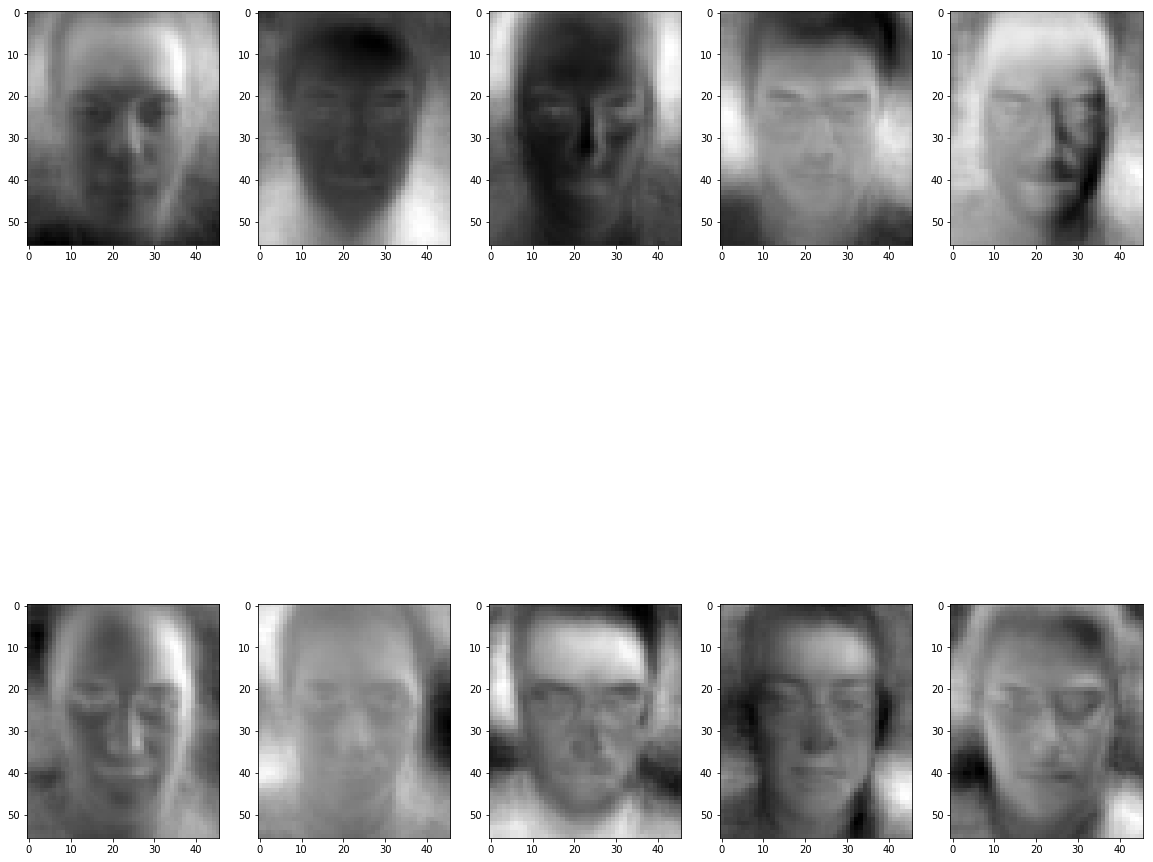

In [119]:
fig = plt.figure( figsize = ( 20, 20 ) )

for i in range( 10 ):
    eigen_vector      = k_eig_pairs[ i ][ 1 ]
    eigen_vector_real = eigen_vector.real
    
    eigen_face_img    = np.reshape( eigen_vector_real, ( 46, 56 ) )
    
    print( eigen_vector_real )
    
    fig.add_subplot( 2, 5, i+1 )
    plt.imshow( eigen_face_img.T, cmap = 'gist_gray' )
    
plt.show()